In [7]:
import pandas as pd
import numpy as np

import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
import folium

import requests as re

In [2]:
search_string = 'Kolkata+India'
urlData = re.get(f'https://nominatim.openstreetmap.org/search.php?q={search_string}&polygon_geojson=1&format=json').json()
bounds = pd.DataFrame.from_dict(urlData)
bounds.head(2)

,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,class,type,importance,icon,geojson
0,340755296,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,10371838,"[22.4503235, 22.6325362, 88.2406237, 88.4589549]",22.5414185,88.35769124388872,"Kolkata, West Bengal, India",boundary,administrative,0.854039,https://nominatim.openstreetmap.org/ui/mapicon...,"{'type': 'Polygon', 'coordinates': [[[88.24062..."
1,299059334,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,9381363,"[22.4503235, 22.6325362, 88.2406237, 88.4589549]",22.5726723,88.3638815,"Kolkata, West Bengal, India",boundary,administrative,0.854039,https://nominatim.openstreetmap.org/ui/mapicon...,"{'type': 'Polygon', 'coordinates': [[[88.24062..."


In [3]:
kolb= gpd.GeoDataFrame({'city':'Kolkata','geometry' : 
                  Polygon(bounds[bounds.type == 'administrative'].head(2).geojson.to_dict()[1][
                      'coordinates'][0])}, index=[0])

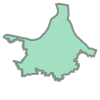

In [4]:
kolb.geometry[0]

In [5]:
kolb

,city,geometry
0,Kolkata,"POLYGON ((88.24062 22.55353, 88.24072 22.55343..."


In [16]:
map_osm = folium.Map(location=[22.55353, 88.24062], zoom_start=11, width=800, height=800)
folium.Marker([22.55353, 88.24062], popup="Point A").add_to(map_osm)
map_osm

In [22]:
boundary_folium = []
for pt in bounds[bounds.type == 'administrative'].head(2).geojson.to_dict()[1]['coordinates']:
    boundary_folium.append([pt[1], pt[0]])   

In [17]:
folium.PolyLine(boundary_folium, color='black').add_to(map_osm)
map_osm